# Project 3

link to the video:https://screencast-o-matic.com/watch/cYjnYUE8Zv

ThE dataset we will work with during this project is about diamonds characteristics is composed of 10 columns that describe both the physical characteristics and prices of nearly 54,000 diamonds. In this project we will construct differents models, compare/contrast the performance OF Three separate feed-forward / back propagating neural networks, to choose which one has the better prediction of the response variable which is the 'cut'.

# THE DATA

In [60]:
import pandas as pd

In [61]:
#load the data 
df=pd.read_csv("https://raw.githubusercontent.com/sarahbismuth/data3/master/Project3_Data.csv")

In [62]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [63]:
#look at the info of the variables to see if they are numerical or categorical 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


As we can see in the previous code the data frame has 3 categorical variables, thus I am going to check what are the values of each categorical variable.

In [64]:
#Values of cut (the response variable)
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [65]:
#Values of color 
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [66]:
#Values of clarity 
df['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [67]:
#check if there is null values 
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

we are now going to look at the summary statistics of the numericaal variables

In [68]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


We can see that x,y and z have a minimum value of 0.This being not realistic we will have to do somthing with it 

In [69]:
df.loc[df['z'] == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [70]:
df.drop(df.loc[df['z'] == 0].index, inplace=True)

# Description if the variables 

price:
price in US dollars (\$326--\$18,823)

carat:
weight of the diamond (0.2--5.01)

cut:
quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color:
diamond colour, from D (best) to J (worst)

clarity:
a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x:
length in mm (0--10.74)

y:
width in mm (0--58.9)

z:
depth in mm (0--31.8)

depth:
total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table:
width of top of diamond relative to widest point (43--95)

# EDA

In [71]:
#import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x149d88390>,
      dtype=object)

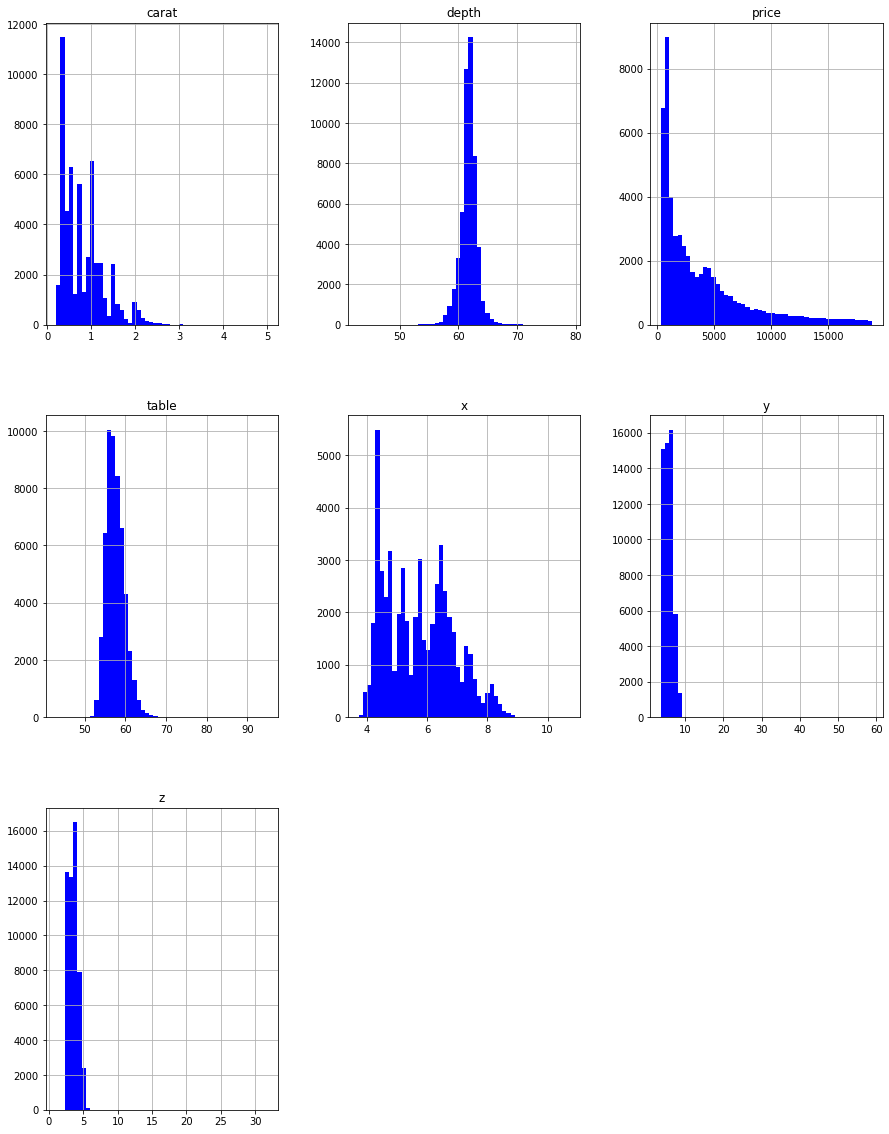

In [72]:
#Distribution of all the variables of the DataFrame
df.hist(figsize=(15,20),bins=50,color='blue')

From the histograms, we can see that the distribution of care is right-skewed and that most of the diamonds seem to be less than 1 carat.
Regarding the depth, the distribution seems to be symmetrical with a pic around 62.
The price distribution is right-skewed, with a majority of the diamonds having a price that is less than 5000$.
The distribution of the table variable is nearly symmetrical with a maximum of around 55.
x which is the length in mm has its maximum a little bit more than 4 mm, y as its max around 5 and z around 3.

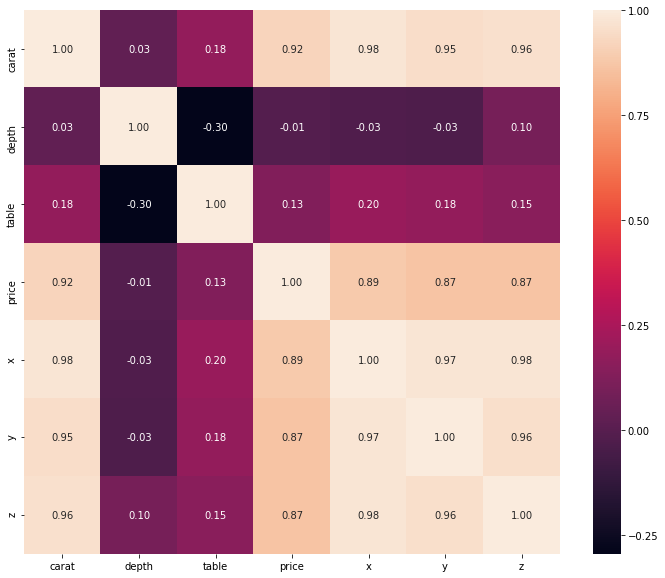

In [73]:
#correlation matrix heatmap
corrMatrix = df.corr()
plt.figure(figsize=( 12,10))
sns.heatmap(corrMatrix,annot=True,fmt=".2f")

Looking at the correlation matrix we can see that the carat variable is highly positively correlated with the price the length, the width and the depth(x,y,z).
The price is also highly correlated with x,y and z.
And that x,y,z have a hight and positive correlation between them.


in the next barplot we are going to look at the distribution of the categorical variables

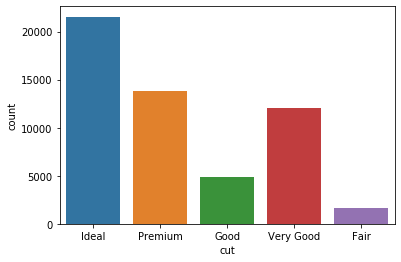

In [74]:
#cut bar plot 
sns.countplot(data = df, x = 'cut')

We can see that most of the diamonds have an Ideal cut which is the best quality. 

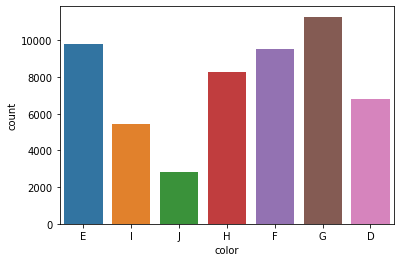

In [75]:
#color bar plot 
sns.countplot(data = df, x = 'color')

we can see that most of the diamonds have a G color,which can be consider as alternative knowing that the worst color is J and the best is D.


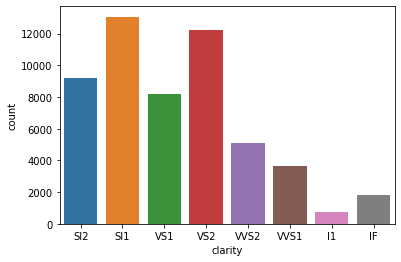

In [76]:
#clarity bar plot 
sns.countplot(data = df, x = 'clarity')

Most of the diamonds have a clarity of SI1 and VS2 which are not the best clarity but can be  a good alternatives knowing that clarity is range this way:I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

# Feature selection 

In [77]:
#define X and y 
X=df.drop(["cut"],1)
y=df['cut']


In the following code we are going to prepare the predictive variables using the ordinal encoder since some of the variables are categorical.

In [78]:
#prepare the predictive variables
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
 

oe = OrdinalEncoder()
oe.fit(X)
X_enc = oe.transform(X)


In this code we are going to prepare the response variable since cut is a categorical variable.

In [79]:
#prepare the response variable 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)
y_enc = le.transform(y)

For the feature selection I am going to use the chi 2 method 

In [80]:
#Import the necessaries library 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

In [81]:
#chi 2 selection
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_enc, y_enc)
X_fs = fs.transform(X_enc)

Feature 0: 70816.458815
Feature 1: 136.536839
Feature 2: 883.962770
Feature 3: 16021.206285
Feature 4: 153515.341837
Feature 5: 2343108.026109
Feature 6: 120335.955246
Feature 7: 99549.494860
Feature 8: 70662.862210


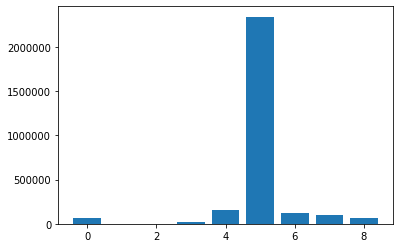

In [82]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [83]:
#name of the variables with the scores that we can see in the graph:
list(X.columns[[0,3,8,4,5,6,7]])

['carat', 'depth', 'z', 'table', 'price', 'x', 'y']

For the feature selection I have decided to drop the 3 variables that had the lowest score in the previous graph.
I have decided not to keep depth because it has a very low chi 2 score, and have decided to drop carat and Z because as we saw in the correlation matrix they are highly correlated with price,x,y( and these 3 variables have higher score in the graph).
Thus, for the model I have decided to keep only 4 variables out of the 10 of the DataFrame.

In [84]:
#that is  the name of the variable we will use after feature selection 
my_features=list(X.columns[[4,5,6,7]])
my_features

['table', 'price', 'x', 'y']

I am keeping table, price,x and Y for the creation of the models

In [85]:
#create a dataframe with only the variables i have chosen
df2=df[my_features]
df2 = pd.concat([df2, df['cut']], axis=1)
df2.head()

,table,price,x,y,cut
0,55.0,326,3.95,3.98,Ideal
1,61.0,326,3.89,3.84,Premium
2,65.0,327,4.05,4.07,Good
3,58.0,334,4.20,4.23,Premium
4,58.0,335,4.34,4.35,Good


# Creation of the models

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale_cols = ['table', 'price', 'x', 'y']
df2[scale_cols] = scaler.fit_transform(df2[scale_cols])

In [87]:
#define X and Y with my new dataframe
X1=df2.drop(["cut"],1)
Y1=df2['cut']

In [88]:
#split the data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    X1, Y1, test_size=0.3, random_state=10)


In [89]:
Y1

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
5        Very Good
6        Very Good
7        Very Good
8             Fair
9        Very Good
10            Good
11           Ideal
12         Premium
13           Ideal
14         Premium
15         Premium
16           Ideal
17            Good
18            Good
19       Very Good
20            Good
21       Very Good
22       Very Good
23       Very Good
24       Very Good
25       Very Good
26         Premium
27       Very Good
28       Very Good
29       Very Good
           ...    
53910      Premium
53911      Premium
53912      Premium
53913         Good
53914         Good
53915        Ideal
53916         Good
53917    Very Good
53918      Premium
53919        Ideal
53920    Very Good
53921    Very Good
53922    Very Good
53923        Ideal
53924        Ideal
53925        Ideal
53926        Ideal
53927         Good
53928      Premium
53929        Ideal
53930      Premium
53931      P

In [90]:
#Some models do not support categrorical data 
#Thus we are going to transform y_train and y_test into numerical with label encoded

#preparation of y_train 
le = LabelEncoder()
le.fit(y_train)
y_enc_train = le.transform(y_train)
#Preparation of y_test 
le.fit(y_test)
y_enc_test = le.transform(y_test)

now we need  to prepare y to have 5 dimensions one for each catgeory before constructing the model 

In [104]:
#preparation of y 
#CONVERT into an array
from keras.utils import to_categorical
y_trainK = to_categorical(y_enc_train)
y_testK = to_categorical(y_enc_test)
y_trainK

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [92]:
##From https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
##Cross-entropy is the default loss function to use for multi-class classification problems. In this case, 
#it is intended for use with multi-class classification where the target values are in the set {0, 1, 3, …, n}, 
#where each class is assigned a unique integer value.

#Mathematically, it is the preferred loss function under the inference framework of maximum likelihood. 
#It is the loss function to be evaluated first and only changed if you have a good reason.
#Cross-entropy will calculate a score that summarizes the average difference between the actual and predicted probability distributions for all classes in the problem. The score is minimized and a perfect cross-entropy value is 0.

#model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

##Also the literature suggests that one hidden layer seems to perform better than adding many layers so we are going to
#only implement models with an input layer, 1 hidden layer and output layer.


We are going to construct function that will allow to have the score of  other metrics than accuracy.

In [93]:

#FUNCTION TO HAVE F1,PRECISION AND RECALL SCORES
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [106]:
We are now going to construct the first model

SyntaxError: invalid syntax (<ipython-input-106-be6344e6eedd>, line 1)

In [94]:
#this is my first model 
#we use softmax because is a multiple class classification problem 
#I choose 8 as the number of nodes for the first layer because it is twice as much as the number of predictors 
#intput_shape=4 vecause i have 4 predictors
#If the NN is a classifier, then it also has a single node unless softmax is used in which case the output layer 
#has one node per class label in your model.

#Input layer - With respect to the number of neurons comprising this layer, this parameter is completely and uniquely determined 
#once you know the shape of your training data. Specifically, the number of neurons comprising that layer is equal 
#to the number of features (columns) in your data. Some NN configurations add one additional node for a bias term

###Output layer - The function requires that the output layer is configured with an n nodes (one for each class), 
#in this case five nodes, and a ‘softmax‘ activation in order to predict the probability for each class.
#The usual choice for multi-class classification is the softmax layer based in the literature.


#One hidden layer is sufficient for the large majority of problems.
#the optimal size of the hidden layer is usually between the size of the input and size of the output layers
#the number of neurons in that layer is the mean of the neurons in the input and output layers.
####Too many neurons (nodes) lead to overfitting and too few lead to underfitting.
##Discussion suggested 
#https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
#The number of hidden neurons should be 
#1) less than twice the size of the input layer
#2) The number of hidden neurons should be between the size of the input layer and the size of the output layer
#3) The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
import numpy as np
from keras.layers import Dense

np.random.seed(42)
modelK = Sequential()
modelK.add(Dense(5, input_dim=4, activation='relu'))
modelK.add(Dense(9, activation="relu"))
modelK.add(Dense(5, activation='softmax'))

#Setting the hyperparameters!
#Cross-entropy will calculate a score that summarizes the average difference between the actual and predicted probability 
#distributions for all classes in the problem. The score is minimized and a perfect cross-entropy value is 0.

##Not much difference in accuracy between 100 and 500 so we chose 100. These seem to be the one most often used in the literature.


opt = SGD(lr=0.01, momentum=0.9)
modelK.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy',f1_m,precision_m, recall_m])
# fit model - We will not use batch sizes or validation sizes because our data set is relatively small in this case
historyK = modelK.fit(x_train, y_trainK, epochs=100, verbose=0)
# evaluate the model
train_acc = modelK.evaluate(x_train, y_trainK, verbose=0)
test_acc = modelK.evaluate(x_test, y_testK, verbose=0)


###Optmizer is stochastic gradient descent: Gradient Descent is the most basic but most used optimization algorithm. 
#It’s used heavily in linear regression and classification algorithms. 
#Backpropagation in neural networks also uses a gradient descent algorithm.
#Source: https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6

#The basic idea of Gradient Descent with momentum is to calculate 
#the exponentially weighted average of your gradients and then use that gradient instead to update your weights.
#It functions faster than the regular algorithm for the gradient descent,
#Using the default value for β = 0.9 is suggested but can be tuned between 0.8 to 0.999 if needed.
#Momentum takes into account past gradients so as to smooth down gradient measures. 
#It can be implemented with descent by batch gradient, descent by mini-batch gradient or descent by stochastic gradient
#Source: https://medium.com/optimization-algorithms-for-deep-neural-networks/gradient-descent-with-momentum-dce805cd8de8

######Learning rate#####
#Most sources say to start with 0.01 as learning rate and play with it from there.
##Will also try sigmoid based on better learning rate.




In [95]:
train_acc

[0.9087425470352173,
 0.6711795330047607,
 0.6543424725532532,
 0.7001816034317017,
 0.6153336763381958]

the loss is high 

In [96]:
test_acc

[1.0040051937103271,
 0.6695722341537476,
 0.6519489884376526,
 0.6975646615028381,
 0.6132040619850159]

In [97]:
#Model 2 is learning rate from 0.01 to 0.001 changed by factor of 10

np.random.seed(42)
modelK2 = Sequential()
modelK2.add(Dense(5, input_dim=4, activation='relu'))
modelK2.add(Dense(9, activation="relu"))
modelK2.add(Dense(5, activation='softmax'))
opt2 = SGD(lr=0.001, momentum=0.9)
modelK2.compile(loss='categorical_crossentropy', optimizer=opt2, metrics=['accuracy',f1_m,precision_m, recall_m])
# fit model
historyK2 = modelK2.fit(x_train, y_trainK, epochs=100, verbose=0)
# evaluate the model
train_acc2 = modelK2.evaluate(x_train, y_trainK, verbose=0)
test_acc2 = modelK2.evaluate(x_test, y_testK, verbose=0)



In [98]:
train_acc2

[0.9329876899719238,
 0.6679736971855164,
 0.6558483839035034,
 0.6890019178390503,
 0.6266684532165527]

In [99]:
test_acc2

[0.9601123929023743,
 0.662957489490509,
 0.6514290571212769,
 0.6847192645072937,
 0.6220973134040833]

In [100]:
####Model 3 is learning rate 0.01 but with sigmoid activation so need to change loss function to binary_crossentropy
#since the sigmoid classifies between 0 and 1. Not much difference with model 2 learning rate so just use simpler model

np.random.seed(42)
modelK3 = Sequential()
modelK3.add(Dense(5, input_dim=4, activation='relu'))
modelK3.add(Dense(9, activation="relu"))
modelK3.add(Dense(5, activation='sigmoid'))
opt3 = SGD(lr=0.01, momentum=0.9)
modelK3.compile(loss='binary_crossentropy', optimizer=opt3, metrics=['accuracy',f1_m,precision_m, recall_m])
# fit model
historyK3 = modelK3.fit(x_train, y_trainK, epochs=100, verbose=0)
# evaluate the model
train_acc3 = modelK3.evaluate(x_train, y_trainK, verbose=0)
test_acc3 = modelK3.evaluate(x_test, y_testK, verbose=0)

In [101]:
train_acc3

[0.31211063265800476,
 0.6663575768470764,
 0.6363588571548462,
 0.7095425724983215,
 0.578787088394165]

In [102]:
test_acc3

[0.3412036597728729,
 0.6611647009849548,
 0.6325097680091858,
 0.7072137594223022,
 0.5742959380149841]

# Best Model 

I think that model 3 is the best model.First because it has the lowest loss score( and we want it to be the closest to 0). But it also have very good f1 and recall score on both the training and the testing model. 
Moreover we can see that there is not a big difference between the testing and the training scores.

# conclusion 

We have constructed different neutral network model, playing with the hyperparameters   in order to predict which of the four veil-color values is most likely to apply to a given observation.
